<a href="https://colab.research.google.com/github/shammah-anucha/Student-Performance-Prediction/blob/main/Final_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries

#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
import matplotlib.colors as colors


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving assessments.csv to assessments.csv
Saving courses.csv to courses.csv
Saving score_weight_sum.csv to score_weight_sum.csv
Saving score_weight_sum_fix.csv to score_weight_sum_fix.csv
Saving studentAssessment.csv to studentAssessment.csv
Saving studentInfo.csv to studentInfo.csv
Saving studentRegistration.csv to studentRegistration.csv
Saving vle.csv to vle.csv
Saving weights.csv to weights.csv


In [ ]:
import io
 
studentInfo = pd.read_csv(io.BytesIO(uploaded['studentInfo.csv']))
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
studentInfo.code_presentation.value_counts()

2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: code_presentation, dtype: int64

In [ ]:
studentInfo['studied_credits'].describe()

count    32593.000000
mean        79.758691
std         41.071900
min         30.000000
25%         60.000000
50%         60.000000
75%        120.000000
max        655.000000
Name: studied_credits, dtype: float64

In [ ]:
studentInfo.shape

(32593, 12)

In [ ]:
# studentInfo_small = studentInfo[['code_module', 'code_presentation']]
# studentInfo_small['id_student'] = studentInfo['id_student']
# studentInfo_small

In [ ]:
studentRegistration = pd.read_csv(io.BytesIO(uploaded['studentRegistration.csv']))
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
studentRegistration.shape

(32593, 5)

In [ ]:
studentRegistration = studentRegistration.drop_duplicates()
print(f'The clean data has {np.shape(studentRegistration)[0]} rows and {np.shape(studentRegistration)[1]} columns')

The clean data has 32593 rows and 5 columns


In [ ]:
studentAssessment = pd.read_csv(io.BytesIO(uploaded['studentAssessment.csv']))
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [ ]:
studentAssessment.shape

(173912, 5)

In [ ]:
studentAssessment.id_assessment.nunique()

188


Since the null values in the score column are as a result of students not submitting the assessment, I will replace the null values with 0

In [ ]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [ ]:
# studentAssessment = studentAssessment.fillna(value=0, method=None, axis=None, inplace=False, limit=None, downcast=None)
# studentAssessment.sort_values(by = 'score', ascending = False)

In [ ]:
# #grouping by the average score of assessments taken by the students
# assessment_scores = studentAssessment.groupby('id_student').mean().sort_values(by='score', ascending = True).reset_index()
# assessment_scores

In [ ]:
# assessment_scores.score.describe()

In [ ]:
# studentAssessment.id_assessment.nunique()

In [ ]:
studentAssessment.id_student.nunique()

23369

In [ ]:
# studentAssessment = studentAssessment.drop_duplicates().dropna()
# print(f'The clean data has {np.shape(studentAssessment)[0]} rows and {np.shape(studentAssessment)[1]} columns')

In [ ]:
# assessment_scores_filtered = assessment_scores[['id_student','score']]
# assessment_scores_filtered

In [ ]:
assessments = pd.read_csv(io.BytesIO(uploaded['assessments.csv']))
assessments.head(20)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [ ]:
assessments.shape

(206, 6)

In [ ]:
assessments.weight.max()

100.0

In [ ]:
assessments.assessment_type.value_counts()

TMA     106
CMA      76
Exam     24
Name: assessment_type, dtype: int64

In [ ]:
assessments.id_assessment.nunique()

206

In [ ]:
# vle = pd.read_csv(io.BytesIO(uploaded['vle.csv']))
# vle.head()

In [ ]:
# vle.shape

In [ ]:
# weights = pd.merge(studentAssessment, assessments, on = 'id_assessment', how = 'left')
# weights

In [ ]:
# weights['score_weight'] = (weights.score*weights.weight)/100
# weights

In [ ]:
# weights.head(20)

In [ ]:
# score_agg = weights.groupby(['id_student','id_assessment','code_presentation','weight','score_weight'])['score_weight'].sum()
# score_agg.head(60)

In [ ]:
# score_agg.weight.value_counts()

In [ ]:
# score_agg

In [ ]:
# weights.to_csv('weights.csv', index = False)
# files.download("weights.csv")

In [ ]:
score_weight_sum = pd.read_csv(io.BytesIO(uploaded['score_weight_sum_fix.csv']))
score_weight_sum

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,score_weight,score_weight_sum,weight_sum
0,1760,6516,116,0,63,AAA,2014J,TMA,117.0,20.0,12.60,63.5,100.0
1,1759,6516,51,0,48,AAA,2014J,TMA,54.0,20.0,9.60,63.5,100.0
2,1758,6516,17,0,60,AAA,2014J,TMA,19.0,10.0,6.00,63.5,100.0
3,1762,6516,210,0,77,AAA,2014J,TMA,215.0,30.0,23.10,63.5,100.0
4,1761,6516,164,0,61,AAA,2014J,TMA,166.0,20.0,12.20,63.5,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,15024,2698588,202,0,95,BBB,2014J,TMA,201.0,35.0,33.25,92.4,100.0
173908,15023,2698588,152,0,95,BBB,2014J,TMA,152.0,35.0,33.25,92.4,100.0
173909,15022,2698588,109,0,87,BBB,2014J,TMA,110.0,20.0,17.40,92.4,100.0
173910,15021,2698588,53,0,85,BBB,2014J,TMA,54.0,10.0,8.50,92.4,100.0


In [ ]:
score_weight_sum_filtered = score_weight_sum[['id_student','code_module','code_presentation','score_weight_sum','weight_sum']]
score_weight_sum_filtered

,id_student,code_module,code_presentation,score_weight_sum,weight_sum
0,6516,AAA,2014J,63.5,100.0
1,6516,AAA,2014J,63.5,100.0
2,6516,AAA,2014J,63.5,100.0
3,6516,AAA,2014J,63.5,100.0
4,6516,AAA,2014J,63.5,100.0
...,...,...,...,...,...
173907,2698588,BBB,2014J,92.4,100.0
173908,2698588,BBB,2014J,92.4,100.0
173909,2698588,BBB,2014J,92.4,100.0
173910,2698588,BBB,2014J,92.4,100.0


In [ ]:
# drop duplicates
score_weight_sum_filtered = score_weight_sum_filtered.drop_duplicates()
score_weight_sum_filtered

,id_student,code_module,code_presentation,score_weight_sum,weight_sum
0,6516,AAA,2014J,63.50,100.0
5,8462,DDD,2013J,34.90,40.0
8,8462,DDD,2014J,43.00,50.0
12,11391,AAA,2013J,82.40,100.0
17,23629,BBB,2013B,16.69,25.0
...,...,...,...,...,...
173889,2698257,AAA,2013J,69.40,100.0
173894,2698535,EEE,2013J,53.44,100.0
173898,2698535,CCC,2014B,9.37,39.0
173902,2698577,BBB,2014J,55.80,100.0


In [ ]:
merged_df = studentInfo.merge(score_weight_sum_filtered, how='inner', left_on=["id_student", "code_module","code_presentation"], right_on=["id_student", "code_module","code_presentation"])
merged_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,100.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,100.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,100.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,100.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,0.0,0.0
25839,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0.0,0.0
25840,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,0.0,0.0
25841,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0.0,0.0


In [ ]:
studentInfo.shape

(32593, 12)

In [ ]:
above_100 = merged_df.loc[merged_df['weight_sum']>100]
above_100

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
6783,CCC,2014B,29764,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction,183.65,200.0
6784,CCC,2014B,29820,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass,160.58,200.0
6785,CCC,2014B,40604,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass,117.44,184.0
6786,CCC,2014B,42638,M,Scotland,HE Qualification,90-100%,35-55,0,60,N,Pass,125.13,200.0
6788,CCC,2014B,46605,M,East Anglian Region,HE Qualification,60-70%,35-55,0,60,N,Distinction,191.22,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15132,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,158.30,200.0
15133,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,145.80,200.0
15136,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,149.05,200.0
15137,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,114.75,200.0


In [ ]:
above_100.describe()

,id_student,num_of_prev_attempts,studied_credits,score_weight_sum,weight_sum
count,4.955000e+03,4955.000000,4955.000000,4955.000000,4955.000000
mean,7.226967e+05,0.118668,76.351160,131.794884,189.520081
std,5.679571e+05,0.395326,34.735952,35.667201,21.254764
min,2.369800e+04,0.000000,30.000000,15.720000,102.000000
25%,5.034630e+05,0.000000,60.000000,105.427500,190.000000
50%,5.884820e+05,0.000000,60.000000,132.375000,200.000000
75%,6.452765e+05,0.000000,90.000000,160.312500,200.000000
max,2.698251e+06,5.000000,630.000000,200.000000,200.000000


In [ ]:
def categorise(row):
   for i in above_100.weight_sum:
     return 200

above_100['weight_sum'] = above_100.apply(lambda row: categorise(row), axis=1)
above_100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
6783,CCC,2014B,29764,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction,183.65,200
6784,CCC,2014B,29820,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass,160.58,200
6785,CCC,2014B,40604,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass,117.44,200
6786,CCC,2014B,42638,M,Scotland,HE Qualification,90-100%,35-55,0,60,N,Pass,125.13,200
6788,CCC,2014B,46605,M,East Anglian Region,HE Qualification,60-70%,35-55,0,60,N,Distinction,191.22,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15132,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,158.30,200
15133,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,145.80,200
15136,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,149.05,200
15137,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,114.75,200


In [ ]:
below_100 = merged_df.loc[merged_df['weight_sum']<100]
below_100

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
14,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,20.2,30.0
17,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.8,70.0
21,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,7.4,10.0
28,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,29.3,50.0
31,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.9,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,0.0,0.0
25839,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0.0,0.0
25840,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,0.0,0.0
25841,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0.0,0.0


In [ ]:
def categorise(row):
   for i in below_100.weight_sum:
     return 100

below_100['weight_sum'] = below_100.apply(lambda row: categorise(row), axis=1)
below_100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
14,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,20.2,100
17,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.8,100
21,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,7.4,100
28,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,29.3,100
31,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.9,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,0.0,100
25839,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0.0,100
25840,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,0.0,100
25841,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,0.0,100


In [ ]:
equal_100 = merged_df.loc[merged_df['weight_sum']==100]
equal_100

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.40,100.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.40,100.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.30,100.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.00,100.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.90,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23722,FFF,2014J,2681198,M,East Anglian Region,Lower Than A Level,70-80%,35-55,0,90,N,Pass,50.50,100.0
23723,FFF,2014J,2682682,F,East Midlands Region,A Level or Equivalent,60-70%,0-35,0,120,Y,Distinction,90.25,100.0
23725,FFF,2014J,2683857,M,South West Region,Lower Than A Level,70-80%,35-55,1,90,N,Pass,73.25,100.0
23727,FFF,2014J,2686035,F,South East Region,Lower Than A Level,90-100%,0-35,0,135,N,Withdrawn,41.50,100.0


In [ ]:
frames = [below_100,equal_100,above_100]

result = pd.concat(frames).reset_index()
result = result.drop(columns=['index'])
result

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
0,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,20.20,100.0
1,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.80,100.0
2,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,7.40,100.0
3,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,29.30,100.0
4,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.90,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,158.30,200.0
25839,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,145.80,200.0
25840,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,149.05,200.0
25841,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,114.75,200.0


In [ ]:
result.describe()

,id_student,num_of_prev_attempts,studied_credits,score_weight_sum,weight_sum
count,2.584300e+04,25843.000000,25843.000000,25843.000000,25843.000000
mean,7.083482e+05,0.156599,76.771853,61.161099,119.173471
std,5.543089e+05,0.467471,38.284005,47.845171,39.367309
min,6.516000e+03,0.000000,30.000000,0.000000,100.000000
25%,5.055140e+05,0.000000,60.000000,16.135000,100.000000
50%,5.891620e+05,0.000000,60.000000,63.540000,100.000000
75%,6.428465e+05,0.000000,90.000000,86.000000,100.000000
max,2.698588e+06,6.000000,630.000000,200.000000,200.000000


In [ ]:
equal_200 = result.loc[result['weight_sum']==200]
equal_200

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
20888,CCC,2014B,29764,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction,183.65,200.0
20889,CCC,2014B,29820,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass,160.58,200.0
20890,CCC,2014B,40604,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass,117.44,200.0
20891,CCC,2014B,42638,M,Scotland,HE Qualification,90-100%,35-55,0,60,N,Pass,125.13,200.0
20892,CCC,2014B,46605,M,East Anglian Region,HE Qualification,60-70%,35-55,0,60,N,Distinction,191.22,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,158.30,200.0
25839,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,145.80,200.0
25840,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,149.05,200.0
25841,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,114.75,200.0


In [ ]:
equal_200.describe()

,id_student,num_of_prev_attempts,studied_credits,score_weight_sum,weight_sum
count,4.955000e+03,4955.000000,4955.000000,4955.000000,4955.0
mean,7.226967e+05,0.118668,76.351160,131.794884,200.0
std,5.679571e+05,0.395326,34.735952,35.667201,0.0
min,2.369800e+04,0.000000,30.000000,15.720000,200.0
25%,5.034630e+05,0.000000,60.000000,105.427500,200.0
50%,5.884820e+05,0.000000,60.000000,132.375000,200.0
75%,6.452765e+05,0.000000,90.000000,160.312500,200.0
max,2.698251e+06,5.000000,630.000000,200.000000,200.0


In [ ]:
equal_200['score_100'] = (equal_200.score_weight_sum*100)/equal_200.weight_sum
equal_200

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum,score_100
20888,CCC,2014B,29764,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction,183.65,200.0,91.825
20889,CCC,2014B,29820,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass,160.58,200.0,80.290
20890,CCC,2014B,40604,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass,117.44,200.0,58.720
20891,CCC,2014B,42638,M,Scotland,HE Qualification,90-100%,35-55,0,60,N,Pass,125.13,200.0,62.565
20892,CCC,2014B,46605,M,East Anglian Region,HE Qualification,60-70%,35-55,0,60,N,Distinction,191.22,200.0,95.610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,158.30,200.0,79.150
25839,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,145.80,200.0,72.900
25840,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,149.05,200.0,74.525
25841,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,114.75,200.0,57.375


In [ ]:
equals_100 = result.loc[result['weight_sum']==100]
equals_100

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
0,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,20.20,100.0
1,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.80,100.0
2,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,7.40,100.0
3,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,29.30,100.0
4,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.90,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,FFF,2014J,2681198,M,East Anglian Region,Lower Than A Level,70-80%,35-55,0,90,N,Pass,50.50,100.0
20884,FFF,2014J,2682682,F,East Midlands Region,A Level or Equivalent,60-70%,0-35,0,120,Y,Distinction,90.25,100.0
20885,FFF,2014J,2683857,M,South West Region,Lower Than A Level,70-80%,35-55,1,90,N,Pass,73.25,100.0
20886,FFF,2014J,2686035,F,South East Region,Lower Than A Level,90-100%,0-35,0,135,N,Withdrawn,41.50,100.0


In [ ]:
equals_100['score_100'] = (equals_100.score_weight_sum*100)/equals_100.weight_sum
equals_100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum,score_100
0,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,20.20,100.0,20.20
1,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.80,100.0,32.80
2,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,7.40,100.0,7.40
3,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,29.30,100.0,29.30
4,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.90,100.0,48.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,FFF,2014J,2681198,M,East Anglian Region,Lower Than A Level,70-80%,35-55,0,90,N,Pass,50.50,100.0,50.50
20884,FFF,2014J,2682682,F,East Midlands Region,A Level or Equivalent,60-70%,0-35,0,120,Y,Distinction,90.25,100.0,90.25
20885,FFF,2014J,2683857,M,South West Region,Lower Than A Level,70-80%,35-55,1,90,N,Pass,73.25,100.0,73.25
20886,FFF,2014J,2686035,F,South East Region,Lower Than A Level,90-100%,0-35,0,135,N,Withdrawn,41.50,100.0,41.50


In [ ]:
frames2 = [equals_100,equal_200]

results2 = pd.concat(frames2).reset_index()
results2 = results2.drop(columns=['index','score_weight_sum','weight_sum'])
results2

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
0,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,20.200
1,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.800
2,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,7.400
3,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,29.300
4,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,79.150
25839,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,72.900
25840,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,74.525
25841,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,57.375


In [ ]:
pass_ = results2.loc[results2['final_result']=='Pass']
pass_

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
4,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.900
19,AAA,2013J,231554,M,London Region,A Level or Equivalent,40-50%,0-35,0,240,N,Pass,52.800
24,AAA,2013J,293699,M,East Midlands Region,A Level or Equivalent,70-80%,0-35,0,120,N,Pass,41.500
27,AAA,2013J,307866,M,West Midlands Region,A Level or Equivalent,70-80%,0-35,0,60,N,Pass,43.300
51,AAA,2013J,1976139,M,Ireland,Lower Than A Level,50-60%,35-55,0,120,N,Pass,50.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,79.150
25839,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,72.900
25840,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,74.525
25841,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,57.375


In [ ]:
pass_.describe()

,id_student,num_of_prev_attempts,studied_credits,score_100
count,1.235800e+04,12358.000000,12358.000000,12358.000000
mean,7.098121e+05,0.120732,74.224389,63.475894
std,5.557829e+05,0.405700,36.075080,23.582043
min,6.516000e+03,0.000000,30.000000,0.000000
25%,5.070205e+05,0.000000,60.000000,56.570000
50%,5.894560e+05,0.000000,60.000000,69.445000
75%,6.435005e+05,0.000000,90.000000,79.000000
max,2.698535e+06,5.000000,630.000000,98.680000


In [ ]:
results2.loc[results2['score_100']==98.68]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
15997,EEE,2013J,610575,M,West Midlands Region,HE Qualification,40-50%,0-35,0,60,N,Pass,98.68


In [ ]:
result.loc[result['score_weight_sum']==98.68]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_weight_sum,weight_sum
15997,EEE,2013J,610575,M,West Midlands Region,HE Qualification,40-50%,0-35,0,60,N,Pass,98.68,100.0


In [ ]:
results2.loc[results2['score_100']>=80]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
158,BBB,2013B,84245,M,Wales,A Level or Equivalent,50-60%,0-35,0,120,N,Distinction,84.920
165,BBB,2013B,92947,F,Wales,HE Qualification,20-Oct,35-55,0,120,N,Distinction,83.200
202,BBB,2013B,229426,F,West Midlands Region,Lower Than A Level,20-30%,0-35,0,60,N,Distinction,82.590
397,BBB,2013B,482710,M,West Midlands Region,A Level or Equivalent,70-80%,35-55,0,60,N,Pass,81.930
410,BBB,2013B,487329,F,Yorkshire Region,A Level or Equivalent,0-10%,0-35,1,180,N,Fail,81.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25819,DDD,2014J,2525964,M,South Region,A Level or Equivalent,40-50%,0-35,0,60,N,Pass,82.275
25822,DDD,2014J,2560520,M,North Western Region,HE Qualification,50-60%,0-35,0,60,N,Distinction,87.375
25824,DDD,2014J,2570274,M,North Western Region,A Level or Equivalent,60-70%,35-55,0,60,N,Pass,83.625
25827,DDD,2014J,2595730,F,Ireland,Lower Than A Level,40-50%,0-35,1,120,N,Pass,83.075


In [ ]:
distinction = results2.loc[results2['final_result']=='Distinction']
distinction

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
154,BBB,2013B,74695,F,North Region,Lower Than A Level,40-50%,0-35,0,90,N,Distinction,75.340
158,BBB,2013B,84245,M,Wales,A Level or Equivalent,50-60%,0-35,0,120,N,Distinction,84.920
165,BBB,2013B,92947,F,Wales,HE Qualification,20-Oct,35-55,0,120,N,Distinction,83.200
170,BBB,2013B,116603,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Distinction,66.930
202,BBB,2013B,229426,F,West Midlands Region,Lower Than A Level,20-30%,0-35,0,60,N,Distinction,82.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,DDD,2014J,2231512,M,South East Region,HE Qualification,90-100%,35-55,0,60,N,Distinction,87.900
25802,DDD,2014J,2339789,M,Scotland,HE Qualification,20-Oct,0-35,0,150,N,Distinction,82.775
25810,DDD,2014J,2471673,M,London Region,HE Qualification,90-100%,55<=,0,100,N,Distinction,77.500
25818,DDD,2014J,2516939,M,Scotland,Post Graduate Qualification,90-100%,35-55,0,60,N,Distinction,82.900


In [ ]:
distinction.describe()

,id_student,num_of_prev_attempts,studied_credits,score_100
count,3.024000e+03,3024.000000,3024.000000,3024.000000
mean,7.537929e+05,0.064815,71.759259,75.440260
std,5.747594e+05,0.295123,34.690593,30.367260
min,2.379800e+04,0.000000,30.000000,0.000000
25%,5.404380e+05,0.000000,60.000000,79.347500
50%,6.071060e+05,0.000000,60.000000,87.250000
75%,6.561760e+05,0.000000,90.000000,91.960625
max,2.698588e+06,6.000000,330.000000,100.000000


In [ ]:
fail = results2.loc[results2['final_result']=='Fail']
fail.describe()

,id_student,num_of_prev_attempts,studied_credits,score_100
count,5.768000e+03,5768.000000,5768.000000,5768.000000
mean,6.750882e+05,0.248960,77.189667,28.227585
std,5.249539e+05,0.584538,38.906825,21.961198
min,2.362900e+04,0.000000,30.000000,0.000000
25%,4.944260e+05,0.000000,60.000000,8.595000
50%,5.793405e+05,0.000000,60.000000,24.980000
75%,6.310770e+05,0.000000,90.000000,44.807500
max,2.698577e+06,6.000000,360.000000,94.160000


In [ ]:
withdrawn = results2.loc[results2['final_result']=='Withdrawn']
withdrawn.describe()

,id_student,num_of_prev_attempts,studied_credits,score_100
count,4.693000e+03,4693.000000,4693.000000,4693.000000
mean,7.160890e+05,0.196676,86.196463,16.765674
std,5.696073e+05,0.522607,43.436186,15.927398
min,8.462000e+03,0.000000,30.000000,0.000000
25%,4.987930e+05,0.000000,60.000000,4.720000
50%,5.873740e+05,0.000000,60.000000,12.480000
75%,6.448830e+05,0.000000,120.000000,23.400000
max,2.698535e+06,6.000000,355.000000,96.220000


In [ ]:
no_withdraw_dist = results2.loc[(results2['final_result']!='Withdrawn') & (results2['final_result']!='Distinction')]
no_withdraw_dist

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
1,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.800
4,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.900
8,AAA,2013J,147756,M,North Region,Lower Than A Level,60-70%,0-35,0,120,N,Fail,51.300
14,AAA,2013J,185439,M,London Region,HE Qualification,20-Oct,0-35,0,120,N,Fail,7.400
18,AAA,2013J,205719,M,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,Y,Fail,27.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,79.150
25839,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,72.900
25840,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,74.525
25841,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,57.375


In [ ]:
c = no_withdraw_dist.copy()
def categorise2(row):
  # if row.score <= 60 and row.final_result == 'Withdrawn':
  #   return 'Withdrawn'
  if row.score_100 >= 0 and row.score_100 <= 40:
    return 'Fail'
  elif row.score_100 > 40 and row.score_100 <= 80:
    return 'Pass'
  elif row.score_100 > 80 and row.score_100 <= 100:
    return 'Distinction'

c['final_result'] = c.apply(lambda row: categorise2(row), axis=1)
c

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
1,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.800
4,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.900
8,AAA,2013J,147756,M,North Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,51.300
14,AAA,2013J,185439,M,London Region,HE Qualification,20-Oct,0-35,0,120,N,Fail,7.400
18,AAA,2013J,205719,M,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,Y,Fail,27.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,DDD,2014J,2677210,M,East Anglian Region,Lower Than A Level,0-10%,0-35,0,120,N,Pass,79.150
25839,DDD,2014J,2678380,M,South East Region,HE Qualification,50-60%,35-55,0,120,N,Pass,72.900
25840,DDD,2014J,2684043,M,East Anglian Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,74.525
25841,DDD,2014J,2685863,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,90,N,Pass,57.375


In [ ]:
# f = [c, withdrawn, distinction]
# r = pd.concat(f)
# r

In [ ]:
a = withdrawn.loc[(withdrawn['final_result']=='Withdrawn')&(withdrawn['score_100']>50)]
a

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
61,AAA,2013J,2391984,M,South Region,A Level or Equivalent,90-100%,0-35,0,60,N,Withdrawn,50.90
108,AAA,2014J,676546,M,Scotland,HE Qualification,80-90%,0-35,0,120,N,Withdrawn,51.50
113,AAA,2014J,1398979,F,South Region,A Level or Equivalent,90-100%,55<=,0,60,N,Withdrawn,50.60
316,BBB,2013B,406974,M,West Midlands Region,A Level or Equivalent,20-Oct,0-35,0,120,N,Withdrawn,53.05
401,BBB,2013B,483371,F,Scotland,HE Qualification,60-70%,35-55,0,120,N,Withdrawn,56.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,FFF,2014B,628476,M,West Midlands Region,Lower Than A Level,20-Oct,0-35,0,60,N,Withdrawn,60.50
19588,FFF,2014B,628846,M,South West Region,A Level or Equivalent,70-80%,0-35,0,90,N,Withdrawn,88.75
19731,FFF,2014B,2114529,M,East Anglian Region,Lower Than A Level,20-30%,0-35,0,60,N,Withdrawn,79.00
20624,FFF,2014J,682894,M,South Region,Lower Than A Level,30-40%,0-35,0,60,N,Withdrawn,53.00


In [ ]:
def categorise3(row):
  # if row.score <= 60 and row.final_result == 'Withdrawn':
  #   return 'Withdrawn'

  if row.score_100 > 40 and row.score_100 <= 80:
    return 'Pass'
  elif row.score_100 > 80 and row.score_100 <= 100:
    return 'Distinction'

a['final_result'] = a.apply(lambda row: categorise3(row), axis=1)
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
61,AAA,2013J,2391984,M,South Region,A Level or Equivalent,90-100%,0-35,0,60,N,Pass,50.90
108,AAA,2014J,676546,M,Scotland,HE Qualification,80-90%,0-35,0,120,N,Pass,51.50
113,AAA,2014J,1398979,F,South Region,A Level or Equivalent,90-100%,55<=,0,60,N,Pass,50.60
316,BBB,2013B,406974,M,West Midlands Region,A Level or Equivalent,20-Oct,0-35,0,120,N,Pass,53.05
401,BBB,2013B,483371,F,Scotland,HE Qualification,60-70%,35-55,0,120,N,Pass,56.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19583,FFF,2014B,628476,M,West Midlands Region,Lower Than A Level,20-Oct,0-35,0,60,N,Pass,60.50
19588,FFF,2014B,628846,M,South West Region,A Level or Equivalent,70-80%,0-35,0,90,N,Distinction,88.75
19731,FFF,2014B,2114529,M,East Anglian Region,Lower Than A Level,20-30%,0-35,0,60,N,Pass,79.00
20624,FFF,2014J,682894,M,South Region,Lower Than A Level,30-40%,0-35,0,60,N,Pass,53.00


In [ ]:
a.final_result.value_counts()

Pass           185
Distinction     26
Name: final_result, dtype: int64

In [ ]:
b = withdrawn.loc[(withdrawn['final_result']=='Withdrawn')&(withdrawn['score_100']<=50)]
b

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
0,AAA,2013J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,20.2000
2,AAA,2013J,94961,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Withdrawn,7.4000
3,AAA,2013J,106247,M,South Region,HE Qualification,80-90%,35-55,0,60,N,Withdrawn,29.3000
5,AAA,2013J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,0,60,N,Withdrawn,40.1000
6,AAA,2013J,135400,F,South East Region,Lower Than A Level,90-100%,35-55,0,60,Y,Withdrawn,17.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19243,FFF,2014B,509292,M,West Midlands Region,Lower Than A Level,20-30%,35-55,0,90,Y,Withdrawn,44.7500
19246,FFF,2014B,511350,M,Yorkshire Region,Lower Than A Level,20-30%,0-35,0,60,Y,Withdrawn,37.7500
19457,FFF,2014B,618124,M,South West Region,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn,36.0000
20886,FFF,2014J,2686035,F,South East Region,Lower Than A Level,90-100%,0-35,0,135,N,Withdrawn,41.5000


In [ ]:
withdrawn.shape

(4693, 13)

In [ ]:
f1 = [a,b]
withdraw_conv = pd.concat(f1)
withdraw_conv = withdraw_conv.reset_index().drop(columns=['index'])
withdraw_conv

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
0,AAA,2013J,2391984,M,South Region,A Level or Equivalent,90-100%,0-35,0,60,N,Pass,50.9000
1,AAA,2014J,676546,M,Scotland,HE Qualification,80-90%,0-35,0,120,N,Pass,51.5000
2,AAA,2014J,1398979,F,South Region,A Level or Equivalent,90-100%,55<=,0,60,N,Pass,50.6000
3,BBB,2013B,406974,M,West Midlands Region,A Level or Equivalent,20-Oct,0-35,0,120,N,Pass,53.0500
4,BBB,2013B,483371,F,Scotland,HE Qualification,60-70%,35-55,0,120,N,Pass,56.7900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,FFF,2014B,509292,M,West Midlands Region,Lower Than A Level,20-30%,35-55,0,90,Y,Withdrawn,44.7500
4689,FFF,2014B,511350,M,Yorkshire Region,Lower Than A Level,20-30%,0-35,0,60,Y,Withdrawn,37.7500
4690,FFF,2014B,618124,M,South West Region,Lower Than A Level,50-60%,0-35,0,60,N,Withdrawn,36.0000
4691,FFF,2014J,2686035,F,South East Region,Lower Than A Level,90-100%,0-35,0,135,N,Withdrawn,41.5000


In [ ]:
d_0 = distinction.loc[(distinction['final_result']=='Distinction')&(distinction['score_100']==0)]
d_0

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
9650,GGG,2013J,24391,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,0,30,N,Distinction,0.0
9654,GGG,2013J,60405,F,Yorkshire Region,A Level or Equivalent,20-Oct,35-55,0,30,N,Distinction,0.0
9658,GGG,2013J,82341,F,South East Region,Lower Than A Level,90-100%,0-35,0,30,Y,Distinction,0.0
9666,GGG,2013J,129212,F,South Region,Lower Than A Level,80-90%,0-35,0,30,N,Distinction,0.0
9669,GGG,2013J,155256,M,South East Region,A Level or Equivalent,30-40%,0-35,0,30,N,Distinction,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,GGG,2014J,2270562,F,South East Region,Lower Than A Level,60-70%,35-55,0,30,N,Distinction,0.0
11751,GGG,2014J,2373245,M,East Midlands Region,Lower Than A Level,20-30%,35-55,0,30,N,Distinction,0.0
11757,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,0.0
11758,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,0.0


In [ ]:
d_1 = distinction.loc[(distinction['final_result']=='Distinction')&(distinction['score_100']>0)]
d_1

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
154,BBB,2013B,74695,F,North Region,Lower Than A Level,40-50%,0-35,0,90,N,Distinction,75.340
158,BBB,2013B,84245,M,Wales,A Level or Equivalent,50-60%,0-35,0,120,N,Distinction,84.920
165,BBB,2013B,92947,F,Wales,HE Qualification,20-Oct,35-55,0,120,N,Distinction,83.200
170,BBB,2013B,116603,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Distinction,66.930
202,BBB,2013B,229426,F,West Midlands Region,Lower Than A Level,20-30%,0-35,0,60,N,Distinction,82.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,DDD,2014J,2231512,M,South East Region,HE Qualification,90-100%,35-55,0,60,N,Distinction,87.900
25802,DDD,2014J,2339789,M,Scotland,HE Qualification,20-Oct,0-35,0,150,N,Distinction,82.775
25810,DDD,2014J,2471673,M,London Region,HE Qualification,90-100%,55<=,0,100,N,Distinction,77.500
25818,DDD,2014J,2516939,M,Scotland,Post Graduate Qualification,90-100%,35-55,0,60,N,Distinction,82.900


In [ ]:
d_1.describe()

,id_student,num_of_prev_attempts,studied_credits,score_100
count,2.628000e+03,2628.000000,2628.000000,2628.000000
mean,7.633226e+05,0.071918,77.572298,86.807971
std,5.910674e+05,0.311808,33.235392,8.602155
min,2.379800e+04,0.000000,30.000000,45.070000
25%,5.335650e+05,0.000000,60.000000,84.115000
50%,6.054890e+05,0.000000,60.000000,88.440000
75%,6.743970e+05,0.000000,90.000000,92.500000
max,2.698588e+06,6.000000,330.000000,100.000000


In [ ]:
# convert 0 to average distinction score
def categorise4(row):
  # if row.score <= 60 and row.final_result == 'Withdrawn':
  #   return 'Withdrawn'

  if row.score_100 == 0:
    return 86.80

d_0['score_100'] = d_0.apply(lambda row: categorise4(row), axis=1)
d_0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
9650,GGG,2013J,24391,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,0,30,N,Distinction,86.8
9654,GGG,2013J,60405,F,Yorkshire Region,A Level or Equivalent,20-Oct,35-55,0,30,N,Distinction,86.8
9658,GGG,2013J,82341,F,South East Region,Lower Than A Level,90-100%,0-35,0,30,Y,Distinction,86.8
9666,GGG,2013J,129212,F,South Region,Lower Than A Level,80-90%,0-35,0,30,N,Distinction,86.8
9669,GGG,2013J,155256,M,South East Region,A Level or Equivalent,30-40%,0-35,0,30,N,Distinction,86.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,GGG,2014J,2270562,F,South East Region,Lower Than A Level,60-70%,35-55,0,30,N,Distinction,86.8
11751,GGG,2014J,2373245,M,East Midlands Region,Lower Than A Level,20-30%,35-55,0,30,N,Distinction,86.8
11757,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,86.8
11758,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,86.8


In [ ]:
# convert distinction score
def categorise5(row):

  if row.score_100 > 0 and row.score_100 <= 40:
    return 'Fail'
  elif row.score_100 > 40 and row.score_100 <= 80:
    return 'Pass'
  elif row.score_100 > 80 and row.score_100 <= 100:
    return 'Distinction'

d_1['final_result'] = d_1.apply(lambda row: categorise5(row), axis=1)
d_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
154,BBB,2013B,74695,F,North Region,Lower Than A Level,40-50%,0-35,0,90,N,Pass,75.340
158,BBB,2013B,84245,M,Wales,A Level or Equivalent,50-60%,0-35,0,120,N,Distinction,84.920
165,BBB,2013B,92947,F,Wales,HE Qualification,20-Oct,35-55,0,120,N,Distinction,83.200
170,BBB,2013B,116603,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,66.930
202,BBB,2013B,229426,F,West Midlands Region,Lower Than A Level,20-30%,0-35,0,60,N,Distinction,82.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,DDD,2014J,2231512,M,South East Region,HE Qualification,90-100%,35-55,0,60,N,Distinction,87.900
25802,DDD,2014J,2339789,M,Scotland,HE Qualification,20-Oct,0-35,0,150,N,Distinction,82.775
25810,DDD,2014J,2471673,M,London Region,HE Qualification,90-100%,55<=,0,100,N,Pass,77.500
25818,DDD,2014J,2516939,M,Scotland,Post Graduate Qualification,90-100%,35-55,0,60,N,Distinction,82.900


In [ ]:
fd = [d_0,d_1]
distinction_conv = pd.concat(fd)
distinction_conv

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
9650,GGG,2013J,24391,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,0,30,N,Distinction,86.800
9654,GGG,2013J,60405,F,Yorkshire Region,A Level or Equivalent,20-Oct,35-55,0,30,N,Distinction,86.800
9658,GGG,2013J,82341,F,South East Region,Lower Than A Level,90-100%,0-35,0,30,Y,Distinction,86.800
9666,GGG,2013J,129212,F,South Region,Lower Than A Level,80-90%,0-35,0,30,N,Distinction,86.800
9669,GGG,2013J,155256,M,South East Region,A Level or Equivalent,30-40%,0-35,0,30,N,Distinction,86.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,DDD,2014J,2231512,M,South East Region,HE Qualification,90-100%,35-55,0,60,N,Distinction,87.900
25802,DDD,2014J,2339789,M,Scotland,HE Qualification,20-Oct,0-35,0,150,N,Distinction,82.775
25810,DDD,2014J,2471673,M,London Region,HE Qualification,90-100%,55<=,0,100,N,Pass,77.500
25818,DDD,2014J,2516939,M,Scotland,Post Graduate Qualification,90-100%,35-55,0,60,N,Distinction,82.900


In [ ]:
distinction.shape

(3024, 13)

In [ ]:
frames6 = [c,withdraw_conv,distinction_conv]
full_conv = pd.concat(frames6).reset_index().drop(columns=['index'])
full_conv

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
0,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,20-Oct,35-55,0,150,N,Fail,32.800
1,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.900
2,AAA,2013J,147756,M,North Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,51.300
3,AAA,2013J,185439,M,London Region,HE Qualification,20-Oct,0-35,0,120,N,Fail,7.400
4,AAA,2013J,205719,M,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,Y,Fail,27.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,DDD,2014J,2231512,M,South East Region,HE Qualification,90-100%,35-55,0,60,N,Distinction,87.900
25839,DDD,2014J,2339789,M,Scotland,HE Qualification,20-Oct,0-35,0,150,N,Distinction,82.775
25840,DDD,2014J,2471673,M,London Region,HE Qualification,90-100%,55<=,0,100,N,Pass,77.500
25841,DDD,2014J,2516939,M,Scotland,Post Graduate Qualification,90-100%,35-55,0,60,N,Distinction,82.900


In [ ]:
distinction_conv.describe()

,id_student,num_of_prev_attempts,studied_credits,score_100
count,3.024000e+03,3024.000000,3024.000000,3024.000000
mean,7.537929e+05,0.064815,71.759259,86.806927
std,5.747594e+05,0.295123,34.690593,8.018963
min,2.379800e+04,0.000000,30.000000,45.070000
25%,5.404380e+05,0.000000,60.000000,85.000000
50%,6.071060e+05,0.000000,60.000000,87.250000
75%,6.561760e+05,0.000000,90.000000,91.960625
max,2.698588e+06,6.000000,330.000000,100.000000


## **Removing Outliers**

In [ ]:
sws = full_conv

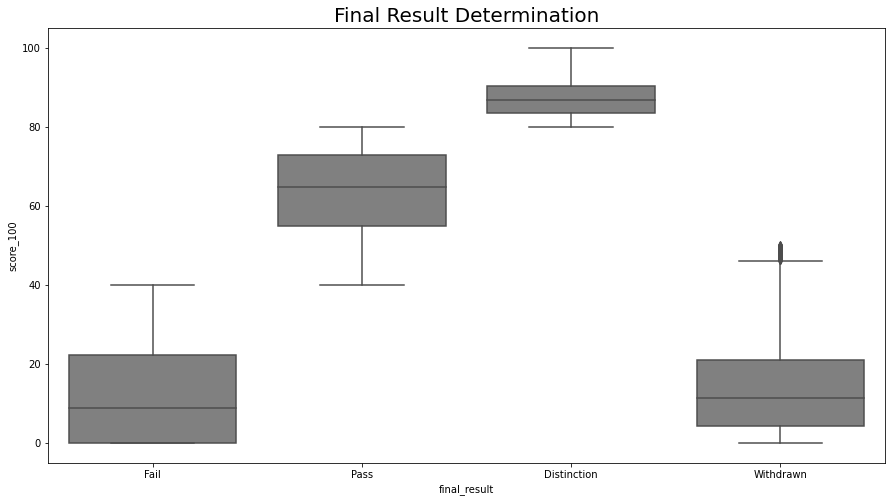

In [ ]:
average_grade = sws[['final_result','score_100']]
fig1, ax = plt.subplots(figsize=[15,8])
ax = sn.boxplot(x = average_grade.final_result, y = average_grade.score_100, data=average_grade, color = 'grey')
plt.title("Final Result Determination", fontsize=20);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


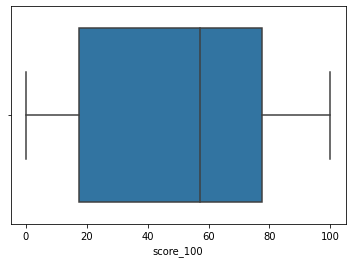

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(sws['score_100'])


In [ ]:
# # IQR
# Q1 = np.percentile(sws_na['score_weight_sum'], 25,
# 				interpolation = 'midpoint')

# Q3 = np.percentile(sws_na['score_weight_sum'], 75,
# 				interpolation = 'midpoint')
# IQR = Q3 - Q1
# IQR

In [ ]:
# # Above Upper bound
# upper = (Q3+1.5*IQR)

# # Below Lower bound
# lower = (Q1-1.5*IQR)

# upper, lower



In [ ]:
# sws_na[(sws_na.score_weight_sum<lower)|(sws_na.score_weight_sum>upper)]

In [ ]:
# sws_no_outliers = sws_na[(sws_na.score_weight_sum>lower)&(sws_na.score_weight_sum<upper)]
# sws_no_outliers

In [ ]:
# from scipy.stats import iqr
# iqr(sws_na.score_weight_sum, axis=0)

The Index of Multiple Deprivation (IMD) 2015 is the official measure of relative deprivation for small areas1 (or neighbourhoods) in England.

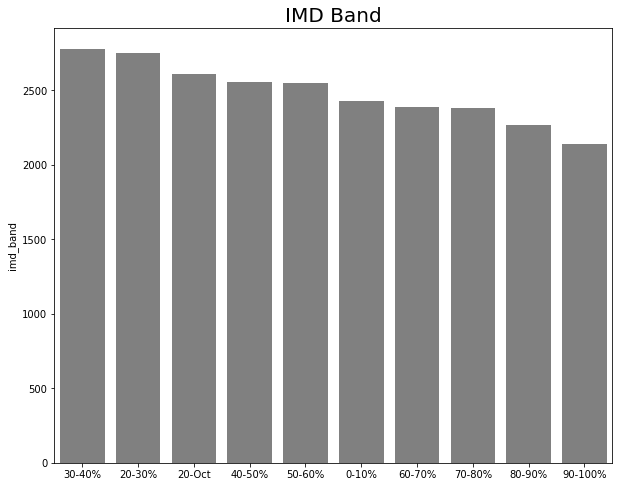

In [ ]:
plt.figure(figsize=(10,8))
sn.barplot( x = sws.imd_band.value_counts().index, y = sws.imd_band.value_counts(), data = sws, color = 'grey')
plt.title("IMD Band", fontsize=20);
plt.show()

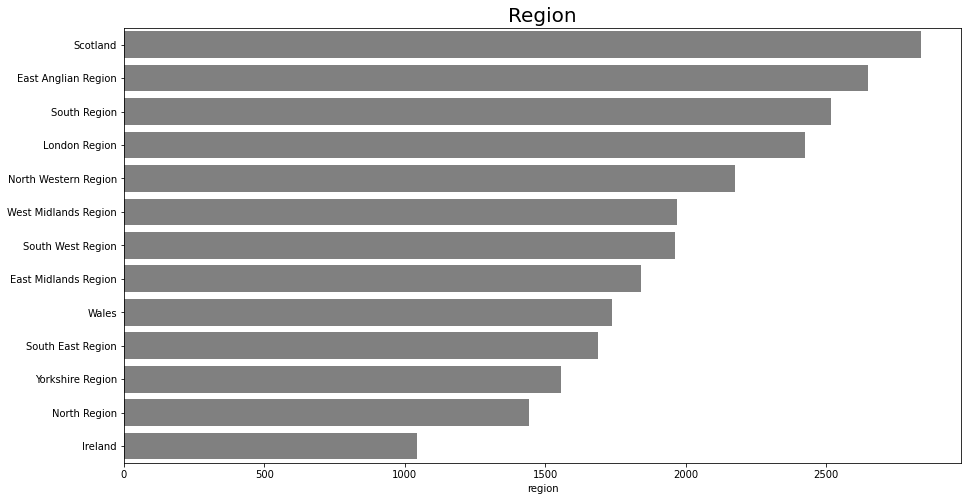

In [ ]:
plt.figure(figsize=(15,8))
sn.barplot( y = sws.region.value_counts().index, x = sws.region.value_counts(), data = sws, color = 'grey')
plt.title("Region", fontsize=20);
plt.show()

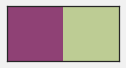

In [ ]:
colors = ['#8F4175','#BDCC94']
sn.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sn.palplot(colors)

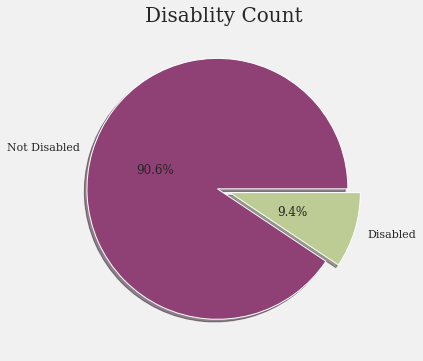

In [ ]:
labels = ['Not Disabled', 'Disabled']
disability = [sws.disability.value_counts()[0],
         sws.disability.value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(disability, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = colors)
plt.title("Disablity Count", fontsize=20);
plt.show()

In [ ]:
sws.disability.value_counts()

N    23422
Y     2421
Name: disability, dtype: int64

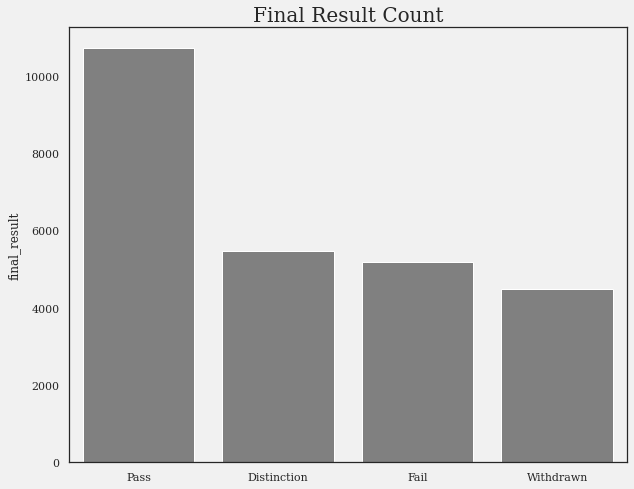

In [ ]:
plt.figure(figsize=(10,8))
sn.barplot( x = sws.final_result.value_counts().index, y = sws.final_result.value_counts(), data = sws, color = 'grey')
plt.title("Final Result Count", fontsize=20);
plt.show()

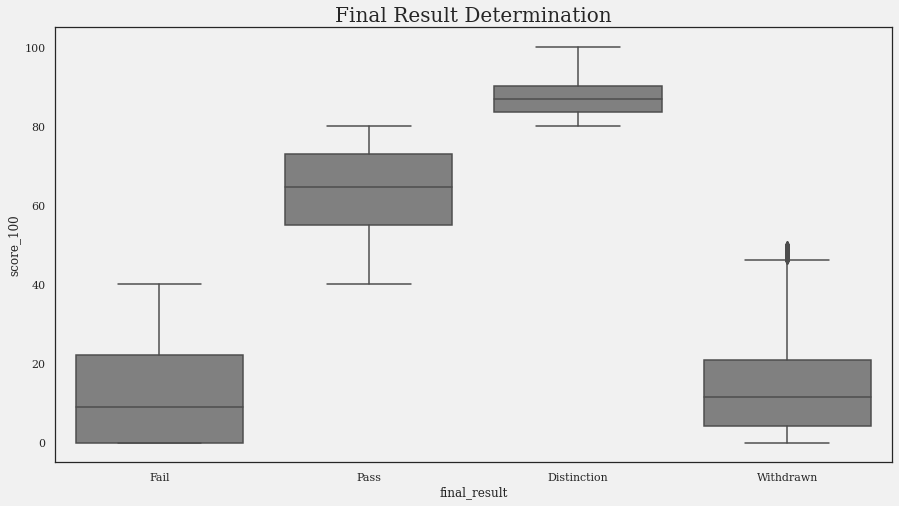

In [ ]:
average_grade = sws[['final_result','score_100']]
fig1, ax = plt.subplots(figsize=[15,8])
ax = sn.boxplot(x = average_grade.final_result, y = average_grade.score_100, data=average_grade, color = 'grey')
plt.title("Final Result Determination", fontsize=20);
plt.show()

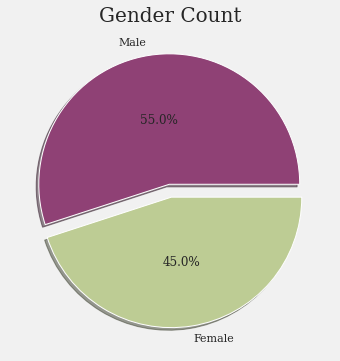

In [ ]:
labels = ['Male', 'Female']
gender = [sws.gender.value_counts()[0],
         sws.gender.value_counts()[1]
        ]
fig1, ax1 = plt.subplots(figsize=[15,6])
ax1.pie(gender, labels=labels,explode=[0.05]*2, autopct='%1.1f%%',pctdistance=0.5, shadow=True, colors = colors)
plt.title("Gender Count", fontsize=20);
plt.show()

In [ ]:
sws.gender.value_counts()

M    14215
F    11628
Name: gender, dtype: int64

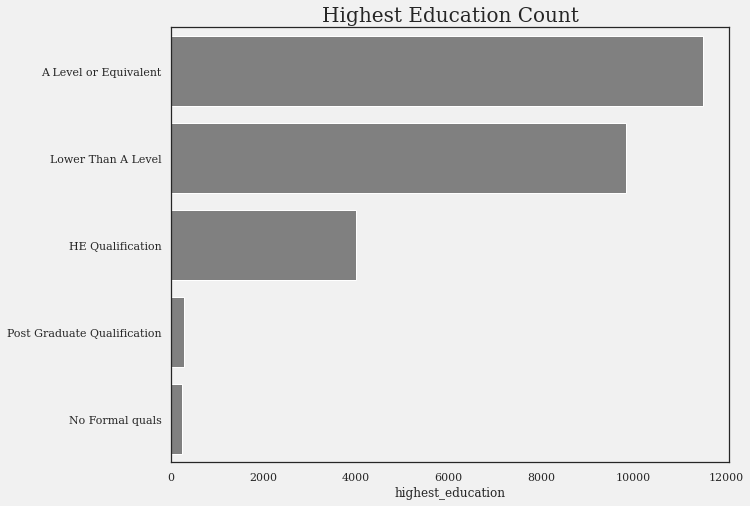

In [ ]:
plt.figure(figsize=(10,8))
sn.barplot( y = sws.highest_education.value_counts().index, x = sws.highest_education.value_counts(), data = sws, color = 'grey')
plt.title("Highest Education Count", fontsize=20);
plt.show()

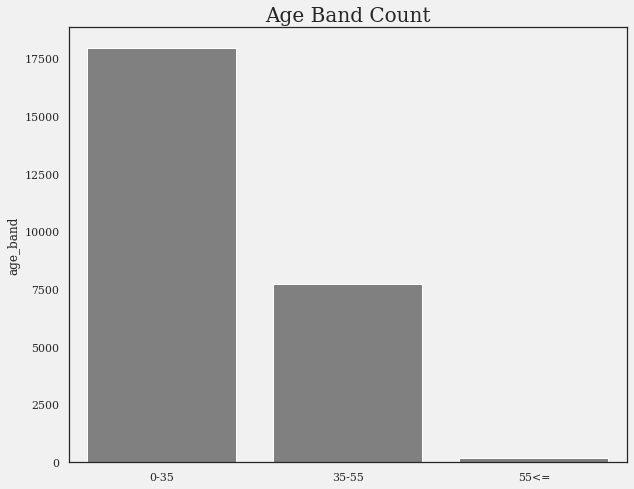

In [ ]:
plt.figure(figsize=(10,8))
sn.barplot( x = sws.age_band.value_counts().index, y = sws.age_band.value_counts(), data = sws, color = 'grey')
plt.title("Age Band Count", fontsize=20);
plt.show()

In [ ]:
sws.num_of_prev_attempts.value_counts()

0    22646
1     2541
2      517
3       99
4       28
5        9
6        3
Name: num_of_prev_attempts, dtype: int64

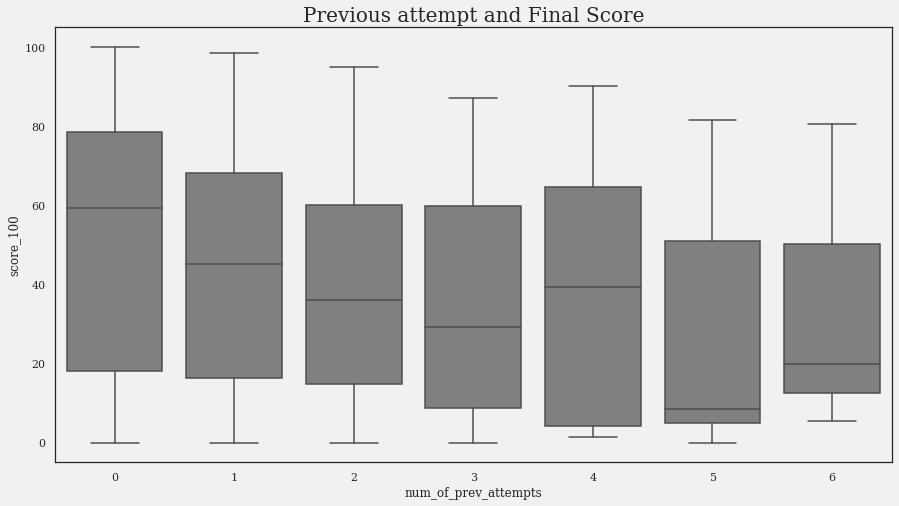

In [ ]:
attempts = sws[['num_of_prev_attempts','score_100']]
fig1, ax = plt.subplots(figsize=[15,8])
ax = sn.boxplot(x = attempts.num_of_prev_attempts, y = attempts.score_100, data=attempts, color = 'grey')
plt.title("Previous attempt and Final Score", fontsize=20);
plt.show()

In [ ]:
credits = sws[['studied_credits','score_100']]
credits.corr()

,studied_credits,score_100
studied_credits,1.000000,0.023984
score_100,0.023984,1.000000


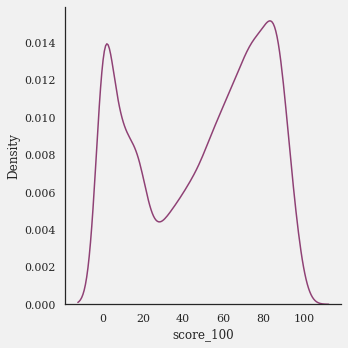

In [ ]:
sn.displot(sws.score_100, kind='kde')

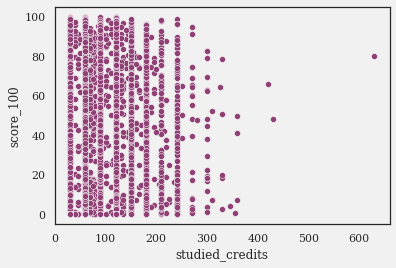

In [ ]:
sn.scatterplot(data = sws, x = 'studied_credits', y = 'score_100')

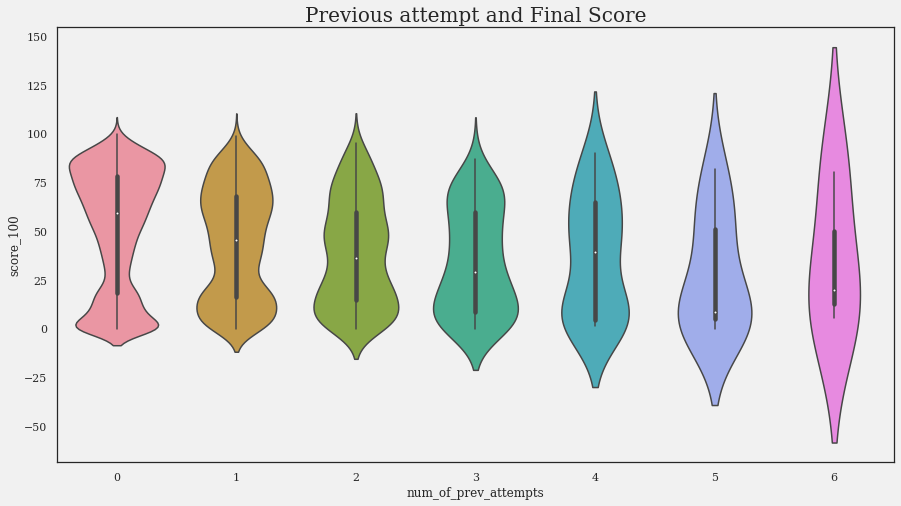

In [ ]:
import seaborn as sb
attempts = sws[['num_of_prev_attempts','score_100']]
fig1, ax = plt.subplots(figsize=[15,8])
ax = sb.violinplot(x = attempts.num_of_prev_attempts, y = attempts.score_100, data=attempts)
plt.title("Previous attempt and Final Score", fontsize=20);
plt.show()

In [ ]:
gen = sws[['final_result','gender']]
passed_m = len(gen[(gen.final_result=='Pass') & (gen.gender =='M')].index)
passed_f = len(gen[(gen.final_result=='Pass') & (gen.gender =='F')].index)
withdrawn_m = len(gen[(gen.final_result=='Withdrawn') & (gen.gender =='M')].index)
withdrawn_f = len(gen[(gen.final_result=='Withdrawn') & (gen.gender =='F')].index)
fail_m = len(gen[(gen.final_result=='Fail') & (gen.gender =='M')].index)
fail_f = len(gen[(gen.final_result=='Fail') & (gen.gender =='F')].index)
distinction_m = len(gen[(gen.final_result=='Distinction') & (gen.gender =='M')].index)
distinction_f = len(gen[(gen.final_result=='Distinction') & (gen.gender =='F')].index)
gender_result = {'Final_result' : ['Pass','Pass','Withdrawn','Withdrawn','Fail', 'Fail','Distinction','Distinction'],
                 'Count of Final_result' : [passed_m, passed_f, withdrawn_m, withdrawn_f, fail_m, fail_f, distinction_m, distinction_f],
                 'Gender' : ['M','F','M','F','M','F','M','F']}
gender_result = pd.DataFrame(gender_result)
gender_result

,Final_result,Count of Final_result,Gender
0,Pass,5690,M
1,Pass,5033,F
2,Withdrawn,2584,M
3,Withdrawn,1898,F
4,Fail,2447,M
5,Fail,2730,F
6,Distinction,3494,M
7,Distinction,1967,F


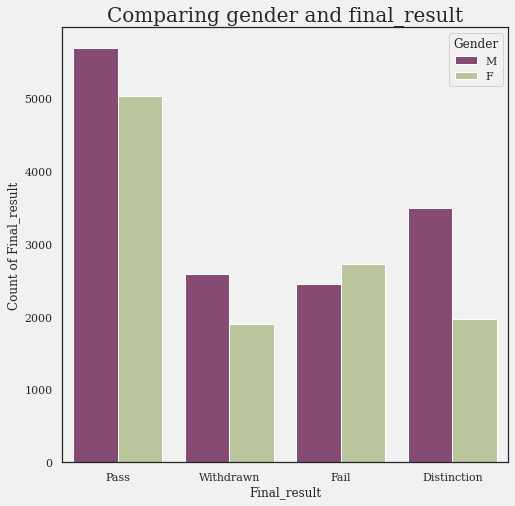

In [ ]:
#comparing gender and final_result
# Set the figure size
plt.figure(figsize=(8, 8))
# grouped barplot
sn.barplot(x= "Final_result", y = 'Count of Final_result', hue="Gender", data=gender_result, ci=None);
plt.title("Comparing gender and final_result", fontsize=20);
plt.show()

In [ ]:
# sn.barplot(data = sws_na, x = sws_na.final_result.value_counts().index, y = sws_na.final_result.value_counts(), hue = 'gender')
# plt.title("Comparing gender and final_result", fontsize=20);
# plt.show()

# plt.figure(figsize=(10,8))
# sn.barplot( x = sws_na.final_result.value_counts().index, y = sws_na.final_result.value_counts(), data = sws_na, hue = 'gender')


In [ ]:
# studentvle = pd.read_csv(io.BytesIO(uploaded['studentVle.csv']))
# studentvle.head()

In [ ]:
# studentvle1 = studentvle.groupby('id_student').sum()
# studentvle1 = studentvle1.reset_index()
# studentvle1 = studentvle1.drop(columns = ["id_site","date"])
# studentvle1.head()

In [ ]:
# studentvle1.shape

**Data Preprocessing**

In [ ]:
#Converting 20-Oct to 10-20% and 0 to 0-10% in the imd_band column
sws_imd = sws.copy()
sws_imd.imd_band.replace(to_replace = 0, value = '0-10%', inplace = True)
sws_imd.imd_band.replace(to_replace = '20-Oct', value = '10-20%', inplace = True)
sws_imd.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
0,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,10-20%,35-55,0,150,N,Fail,32.8
1,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass,48.9
2,AAA,2013J,147756,M,North Region,Lower Than A Level,60-70%,0-35,0,120,N,Pass,51.3
3,AAA,2013J,185439,M,London Region,HE Qualification,10-20%,0-35,0,120,N,Fail,7.4
4,AAA,2013J,205719,M,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,Y,Fail,27.3


In [ ]:
# grades = sws_imd[['final_result','score',]]
# grades.head()

In [ ]:
# results = []
# for i in grades.score:
#   if i >= 0 and i <= 45 :
#     results.append('Fail')
#   elif i > 45 and i <= 80:
#     results.append('Pass')
#   elif i > 80 and i <= 100:
#     results.append('Distinction')


# results
# grades['result'] = results
# grades

In [ ]:
# def categorise(row):
#   # if row.score <= 60 and row.final_result == 'Withdrawn':
#   #   return 'Withdrawn'
#   if row.score >= 0 and row.score <= 45:
#     return 'Fail'
#   elif row.score > 45 and row.score <= 80:
#     return 'Pass'
#   elif row.score > 80 and row.score <= 100:
#     return 'Distinction'

# grades['colF'] = grades.apply(lambda row: categorise(row), axis=1)
# grades

In [ ]:
# grades.to_csv('grades.csv', index = False)
# files.download("grades.csv")

In [ ]:
# fig1, ax = plt.subplots(figsize=[15,8])
# ax = sn.boxplot(x = grades.colF, y = grades.score, data=grades, color = 'grey')
# plt.title("Final Result Determination", fontsize=20);
# plt.show()

In [ ]:
# grades.colF.value_counts()

In [ ]:
sws_imd.final_result.value_counts()

Pass           10723
Distinction     5461
Fail            5177
Withdrawn       4482
Name: final_result, dtype: int64

In [ ]:
# sws_logs = pd.merge(sws_imd, studentvle1, on = 'id_student', how = 'left')
# sws_logs

In [ ]:
# sws_logs = sws_logs.dropna()
# sws_logs

In [ ]:
# sws_imd['final_result'] = grades['colF']
# sws_imd

In [ ]:
# sws_logs1 = pd.merge(sws_imd, studentvle1, on = 'id_student', how = 'left')
# sws_logs1

In [ ]:
# full_set = sws_logs1.drop(columns=['code_module', 'code_presentation','id_student'])
# full_set

In [ ]:
# full_set.to_csv('full_set.csv', index = False)
# files.download("full_set.csv")

In [ ]:
sws_imd.imd_band.value_counts()

30-40%     2780
20-30%     2749
10-20%     2609
40-50%     2553
50-60%     2547
0-10%      2427
60-70%     2388
70-80%     2382
80-90%     2270
90-100%    2140
Name: imd_band, dtype: int64

Showing ranking of deprived areas with 0-10% as most deprived and 90-100% as least deprived

In [ ]:
imd = sws_imd[['imd_band','final_result']]
passed_10 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='0-10%')].index)
withdrawn_10 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='0-10%')].index)
fail_10 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='0-10%')].index)
distinction_10 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='0-10%')].index)

passed_20 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='10-20%')].index)
withdrawn_20 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='10-20%')].index)
fail_20 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='10-20%')].index)
distinction_20 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='10-20%')].index)

passed_30 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='20-30%')].index)
withdrawn_30 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='20-30%')].index)
fail_30 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='20-30%')].index)
distinction_30 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='20-30%')].index)

passed_40 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='30-40%')].index)
withdrawn_40 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='30-40%')].index)
fail_40 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='30-40%')].index)
distinction_40 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='30-40%')].index)

passed_50 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='40-50%')].index)
withdrawn_50 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='40-50%')].index)
fail_50 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='40-50%')].index)
distinction_50 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='40-50%')].index)

passed_60 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='50-60%')].index)
withdrawn_60 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='50-60%')].index)
fail_60 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='50-60%')].index)
distinction_60 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='50-60%')].index)

passed_70 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='60-70%')].index)
withdrawn_70 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='60-70%')].index)
fail_70 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='60-70%')].index)
distinction_70 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='60-70%')].index)

passed_80 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='70-80%')].index)
withdrawn_80 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='70-80%')].index)
fail_80 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='70-80%')].index)
distinction_80 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='70-80%')].index)

passed_90 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='80-90%')].index)
withdrawn_90 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='80-90%')].index)
fail_90 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='80-90%')].index)
distinction_90 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='80-90%')].index)

passed_100 = len(imd[(imd.final_result =='Pass') & (imd.imd_band =='90-100%')].index)
withdrawn_100 = len(imd[(imd.final_result=='Withdrawn') & (imd.imd_band =='90-100%')].index)
fail_100 = len(imd[(imd.final_result=='Fail') & (imd.imd_band =='90-100%')].index)
distinction_100 = len(imd[(imd.final_result=='Distinction') & (imd.imd_band =='90-100%')].index)


imd_result = {'Final_result' : ['Pass','Withdrawn','Fail','Distinction','Pass','Withdrawn','Fail','Distinction','Pass','Withdrawn','Fail','Distinction',
                                   'Pass','Withdrawn','Fail','Distinction','Pass','Withdrawn','Fail','Distinction','Pass','Withdrawn','Fail','Distinction',
                                   'Pass','Withdrawn','Fail','Distinction','Pass','Withdrawn','Fail','Distinction','Pass','Withdrawn','Fail','Distinction',
                                   'Pass','Withdrawn','Fail','Distinction'],
                 'Count of Final_result' : [passed_10, withdrawn_10, fail_10, distinction_10,
                                            passed_20, withdrawn_20, fail_20, distinction_20,
                                            passed_30, withdrawn_30, fail_30, distinction_30,
                                            passed_40, withdrawn_40, fail_40, distinction_40,
                                            passed_50, withdrawn_50, fail_50, distinction_50,
                                            passed_60, withdrawn_60, fail_60, distinction_60,
                                            passed_70, withdrawn_70, fail_70, distinction_70,
                                            passed_80, withdrawn_80, fail_80, distinction_80,
                                            passed_90, withdrawn_90, fail_90, distinction_90,
                                            passed_100, withdrawn_100, fail_100, distinction_100],
                 'imd_band' : ['0-10%','0-10%','0-10%','0-10%','10-20%','10-20%','10-20%','10-20%',
                               '20-30%','20-30%','20-30%','20-30%','30-40%','30-40%','30-40%','30-40%',
                               '40-50%', '40-50%', '40-50%', '40-50%', '50-60%', '50-60%', '50-60%','50-60%',
                               '60-70%', '60-70%', '60-70%','60-70%','70-80%', '70-80%','70-80%','70-80%',
                               '80-90%','80-90%','80-90%','80-90%','90-100%','90-100%','90-100%','90-100%']}
imd_result = pd.DataFrame(imd_result)
imd_result.head()

,Final_result,Count of Final_result,imd_band
0,Pass,956,0-10%
1,Withdrawn,516,0-10%
2,Fail,643,0-10%
3,Distinction,312,0-10%
4,Pass,1003,10-20%


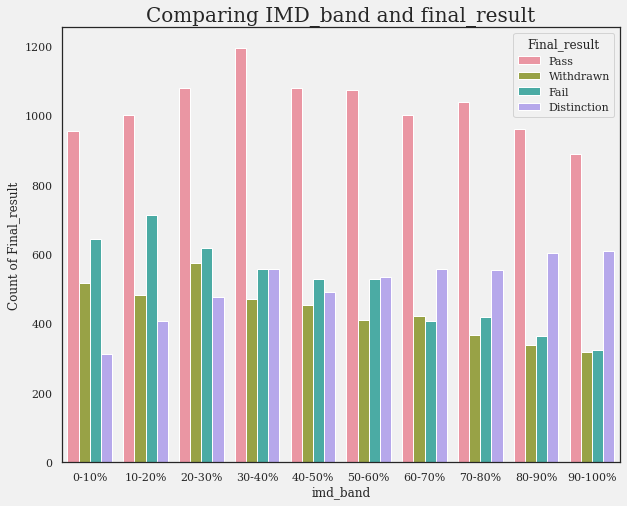

In [ ]:
#comparing imd_band and final_result
# Set the figure size
plt.figure(figsize=(10, 8))
# grouped barplot
sb.barplot(x= "imd_band", y = 'Count of Final_result', hue="Final_result", data=imd_result, ci=None);
plt.title("Comparing IMD_band and final_result", fontsize=20);
plt.show()

In [ ]:
# #from sklearn.preprocessing import LabelEncoder
# from sklearn import preprocessing
# # creating instance of labelencoder
# le = preprocessing.LabelEncoder()
# # Assigning numerical values and storing in another variable
# ss = sws_imd #sws_imd
# ss['code_module_encoded'] = le.fit_transform(ss.code_module)
# ss['imd_band_encoded'] = le.fit_transform(ss.imd_band)
# ss['gender_encoded'] = le.fit_transform(ss.gender)
# ss['disability_encoded'] = le.fit_transform(ss.disability)
# ss['highest_education_encoded'] = le.fit_transform(ss.highest_education)
# ss['age_band_encoded'] = le.fit_transform(ss.age_band)
# ss['region_encoded'] = le.fit_transform(ss.region)
# ss['final_result_encoded'] = le.fit_transform(ss.final_result)
# ss.head()

In [ ]:
sws_enc = pd.get_dummies(sws_imd, columns = ['code_module','region','highest_education','imd_band','age_band','final_result','disability','gender','code_presentation'])
sws_enc

,id_student,num_of_prev_attempts,studied_credits,score_100,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,...,final_result_Pass,final_result_Withdrawn,disability_N,disability_Y,gender_F,gender_M,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,74372,0,150,32.800,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,111717,0,60,48.900,1,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
2,147756,0,120,51.300,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
3,185439,0,120,7.400,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,205719,0,90,27.300,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,2231512,0,60,87.900,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
25839,2339789,0,150,82.775,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
25840,2471673,0,100,77.500,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
25841,2516939,0,60,82.900,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
# #from sklearn.preprocessing import LabelEncoder
# from sklearn import preprocessing
# # creating instance of labelencoder
# le = preprocessing.LabelEncoder()
# # Assigning numerical values and storing in another variable
# pp = sws_logs3.copy() #sws_imd
# pp['gender_encoded'] = le.fit_transform(pp.gender)
# pp['disability_encoded'] = le.fit_transform(pp.disability)
# pp.head()

In [ ]:
filtered = sws_enc.drop(columns = ['id_student',"disability_N","gender_F"])
filtered.head()

,num_of_prev_attempts,studied_credits,score_100,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,...,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn,disability_Y,gender_M,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,0,150,32.8,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,60,48.9,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,120,51.3,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,120,7.4,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,90,27.3,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0


In [ ]:
filtered.columns

Index(['num_of_prev_attempts', 'studied_credits', 'score_100',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'region_East Anglian Region',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',
       'imd_band_10-20%', 'imd_band_20-30%', 'imd_band_30-40%',
       'imd_band_40-50%', 'imd_band_50-60%', 'imd_band_60-70%',
       'imd_band_70-80%', 'imd_

We can see a relationship between people from deprived and recognised regioins and their results. We can see that People from deprived countries are more likely to withdraw from school than people from undeprived regions and vice versa

In [ ]:
# filtered = ss.drop(columns = ['code_module', 'code_presentation','id_student','gender','region','highest_education','imd_band','age_band','disability',
#                               'final_result', 'studied_credits','code_module_encoded', ])
# filtered.head()

In [ ]:
# filtered2 = pd.get_dummies(filtered, columns = ['final_result_encoded'])
# filtered2

In [ ]:
# filtered.final_result_encoded.value_counts()

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

filtered_norm = filtered.copy()
cols_to_scale = ['num_of_prev_attempts', 'studied_credits','score_100']

filtered_norm[cols_to_scale] = scaler.fit_transform(filtered_norm[cols_to_scale])
filtered_norm


,num_of_prev_attempts,studied_credits,score_100,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,...,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn,disability_Y,gender_M,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,0.0,0.200000,0.32800,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.0,0.050000,0.48900,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.0,0.150000,0.51300,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0.0,0.150000,0.07400,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0.0,0.100000,0.27300,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,0.0,0.050000,0.87900,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
25839,0.0,0.200000,0.82775,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
25840,0.0,0.116667,0.77500,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
25841,0.0,0.050000,0.82900,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


# Random Undersampling technique

In [ ]:
# # class count
# class_count_3, class_count_2,class_count_1, class_count_0 = filtered_norm[['final_result']].value_counts()

# # Separate class
# class_0 = filtered_norm[filtered_norm['final_result'] == 0]
# class_1 = filtered_norm[filtered_norm['final_result'] == 1]
# class_2 = filtered_norm[filtered_norm['final_result'] == 2]
# class_3 = filtered_norm[filtered_norm['final_result'] == 3]# print the shape of the class
# print('class 0:', class_0.shape)
# print('class 1:', class_1.shape)
# print('class 2:', class_2.shape)
# print('class 3:', class_3.shape)

In [ ]:
# class_3_under = class_3.sample(class_count_0)
# class_2_under = class_2.sample(class_count_0)
# class_1_under = class_1.sample(class_count_0)
# filtered1 = pd.concat([class_3_under,class_2_under, class_1_under, class_0], axis=0)

# print("total class of 3, 2, 1 and 0:",filtered1['final_result'].value_counts())# plot the count after under-sampeling
# filtered1['final_result'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
# filtered1

In [ ]:
filtered.final_result_Fail.value_counts()

0    20666
1     5177
Name: final_result_Fail, dtype: int64

# Correlation

In [ ]:
# filtered_norm.final_result_encoded.value_counts()

In [ ]:
filtered_corr = filtered.corr()
filtered_corr

,num_of_prev_attempts,studied_credits,score_100,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,...,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn,disability_Y,gender_M,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
num_of_prev_attempts,1.000000,0.185691,-0.092653,-0.037808,0.053939,-0.083978,0.083712,-0.072667,0.048091,-0.077276,...,-0.090877,0.061277,-0.006756,0.042003,0.058201,-0.025967,0.074320,-0.036004,-0.006043,-0.016211
studied_credits,0.185691,1.000000,0.023984,0.024049,0.067931,-0.042340,0.075525,-0.107304,0.172136,-0.333793,...,-0.052541,-0.136705,0.064795,0.116844,0.045911,0.029619,0.108675,-0.011793,-0.056578,-0.019681
score_100,-0.092653,0.023984,1.000000,0.056327,0.048841,-0.099215,-0.018112,0.179558,0.110519,-0.320207,...,0.618578,-0.593242,0.366425,-0.516688,-0.089787,0.091213,0.025711,0.023065,-0.073576,0.024489
code_module_AAA,-0.037808,0.024049,0.056327,1.000000,-0.092857,-0.065325,-0.081453,-0.052318,-0.095023,-0.049960,...,-0.033153,-0.059485,0.094723,-0.024637,-0.024493,0.012516,-0.069586,0.091126,-0.092038,0.047984
code_module_BBB,0.053939,0.067931,0.048841,-0.092857,1.000000,-0.216291,-0.269688,-0.173225,-0.314620,-0.165415,...,-0.096141,-0.058673,0.163977,-0.047702,-0.001346,-0.486698,0.122119,0.008167,-0.044255,-0.059363
code_module_CCC,-0.083978,-0.042340,-0.099215,-0.065325,-0.216291,1.000000,-0.189727,-0.121865,-0.221337,-0.116370,...,-0.037576,-0.012196,-0.064754,0.137674,-0.020684,0.157296,-0.162086,-0.240131,0.168763,0.196346
code_module_DDD,0.083712,0.075525,-0.018112,-0.081453,-0.269688,-0.189727,1.000000,-0.151951,-0.275980,-0.145099,...,-0.088859,-0.053192,0.072398,0.057827,0.032696,0.047567,0.093583,0.032686,-0.047290,-0.058424
code_module_EEE,-0.072667,-0.107304,0.179558,-0.052318,-0.173225,-0.121865,-0.151951,1.000000,-0.177267,-0.093200,...,0.198275,-0.075524,-0.050081,-0.068777,-0.042121,0.210413,-0.129813,0.059529,0.000939,0.039998
code_module_FFF,0.048091,0.172136,0.110519,-0.095023,-0.314620,-0.221337,-0.275980,-0.177267,1.000000,-0.169274,...,0.098266,-0.077674,-0.019681,0.001767,-0.003598,0.307696,0.113040,0.029146,-0.054264,-0.063406
code_module_GGG,-0.077276,-0.333793,-0.320207,-0.049960,-0.165415,-0.116370,-0.145099,-0.093200,-0.169274,1.000000,...,-0.017403,0.417821,-0.251230,-0.095987,0.044669,-0.217408,-0.123960,0.075494,0.066616,-0.037622


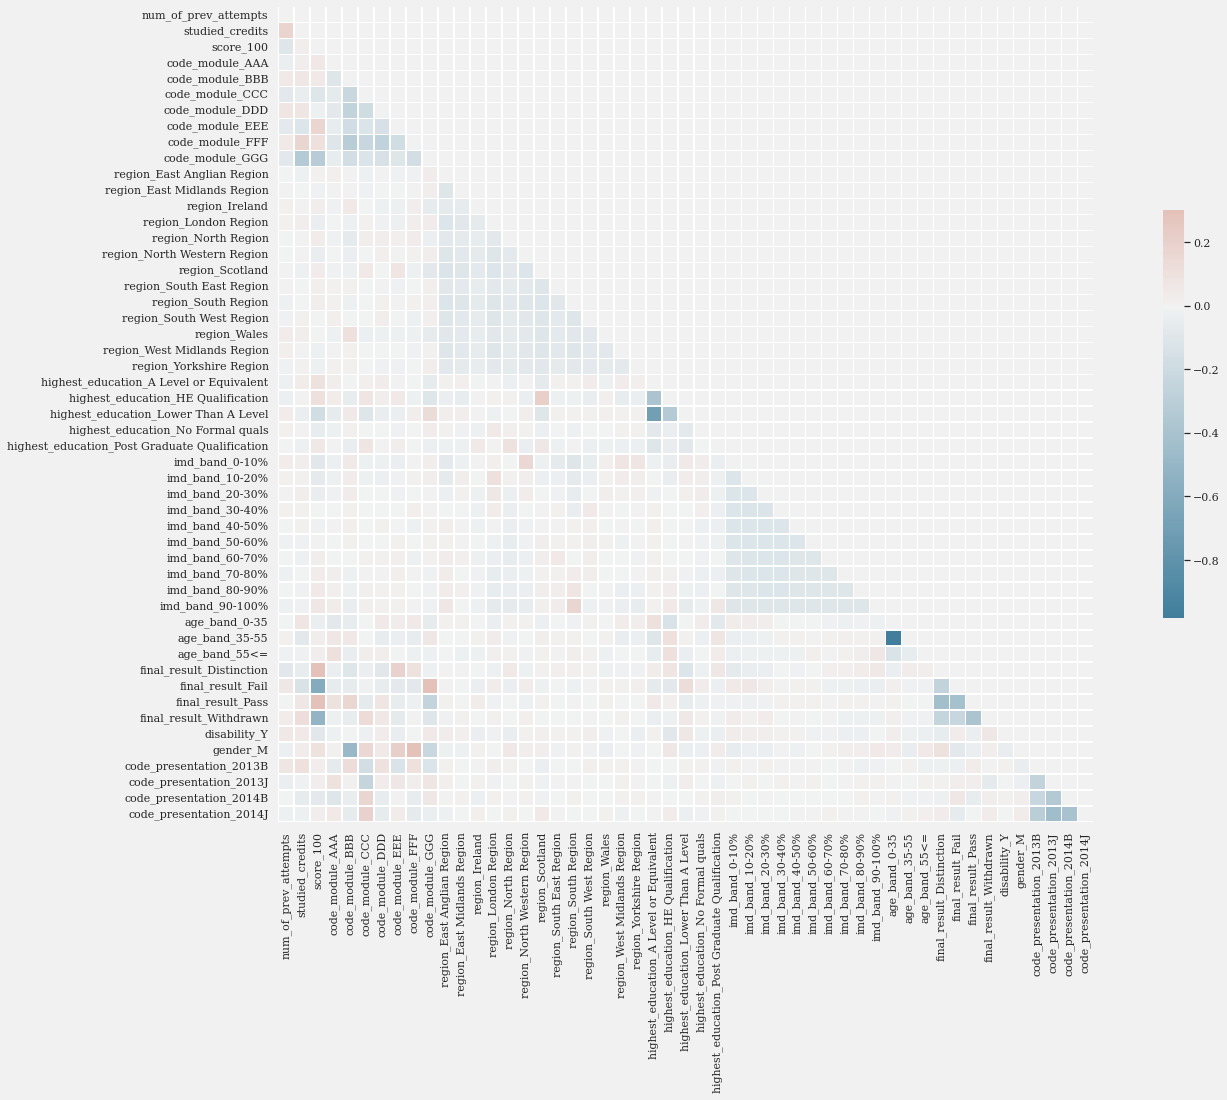

In [ ]:
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(filtered_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# **ANN**

In [ ]:
X = filtered_norm.drop(columns = ['final_result_Distinction', 'final_result_Fail', 'final_result_Pass','final_result_Withdrawn'])
Y = filtered_norm[['final_result_Distinction', 'final_result_Fail', 'final_result_Pass','final_result_Withdrawn']]

In [ ]:
# X1 = sws_imd.drop(columns = ['final_result'])
# Y1 = sws_imd[['final_result']]

In [ ]:
from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)
# # The train and test size of X
# X_train.shape, X_test.shape

# set aside 20% of train and test data for evaluation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 1000)

# Use the same function above for the validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state= 1000)


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("Y_test shape: {}".format(Y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("Y_val shape: {}".format(Y_val.shape))

X_train shape: (18606, 47)
X_test shape: (5169, 47)
Y_train shape: (18606, 4)
Y_test shape: (5169, 4)
X_val shape: (2068, 47)
Y_val shape: (2068, 4)


In [ ]:
# from sklearn.model_selection import train_test_split

# # X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)
# # # The train and test size of X
# # X_train.shape, X_test.shape

# # set aside 20% of train and test data for evaluation
# X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, shuffle = True, random_state = 1000)

# # Use the same function above for the validation set
# X1_train, X1_val, Y1_train, Y1_val = train_test_split(X1_train, Y1_train, test_size=0.2, random_state= 1000) # 0.25 x 0.8 = 0.2


# print("X_train shape: {}".format(X1_train.shape))
# print("X_test shape: {}".format(X1_test.shape))
# print("Y_train shape: {}".format(Y1_train.shape))
# print("Y_test shape: {}".format(Y1_test.shape))
# print("X_val shape: {}".format(X1_val.shape))
# print("Y_val shape: {}".format(Y1_val.shape))

In [ ]:
X_test.to_csv('testing header.csv', index = False)
files.download("testing header.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Y1_test.to_csv('target data.csv', index = False)
# files.download("target data.csv")

In [ ]:
Y_test

,final_result_Distinction,final_result_Fail,final_result_Pass,final_result_Withdrawn
23650,1,0,0,0
21639,0,0,0,1
25036,1,0,0,0
3956,0,1,0,0
107,0,0,1,0
...,...,...,...,...
149,0,0,1,0
4784,0,1,0,0
11145,0,0,1,0
15058,0,1,0,0


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

def create_model():
  model = keras.Sequential([
      keras.layers.Dense(12, input_shape = (47,), activation='relu'),
      keras.layers.Dense(8, activation='relu'),
      # keras.layers.Dense(6, activation='sigmoid'),
      keras.layers.Dense(4, activation='softmax')
  ])
  model.compile(loss = "categorical_crossentropy", optimizer = "adam",metrics = ['accuracy'])

  checkpoint_path = "training_1/cp.ckpt"
  checkpoint_dir = os.path.dirname(checkpoint_path)

  # Create a callback that saves the model's weights
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  save_weights_only=True,
                                                  verbose=1)

  # I fit the model here and let it run for 150 epochs.
  training = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 150, callbacks=[cp_callback]) # Pass callback to training
  return model
# Create a basic model instance
model = create_model()
# Display the model's architecture
model.summary()

Epoch 1/150
576/582 [============================>.] - ETA: 0s - loss: 1.0723 - accuracy: 0.5180
Epoch 1: saving model to training_1/cp.ckpt
582/582 [==============================] - 2s 2ms/step - loss: 1.0685 - accuracy: 0.5197 - val_loss: 0.6763 - val_accuracy: 0.6857
Epoch 2/150
581/582 [============================>.] - ETA: 0s - loss: 0.5269 - accuracy: 0.7743
Epoch 2: saving model to training_1/cp.ckpt
582/582 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.7744 - val_loss: 0.4286 - val_accuracy: 0.8148
Epoch 3/150
569/582 [============================>.] - ETA: 0s - loss: 0.3955 - accuracy: 0.8259
Epoch 3: saving model to training_1/cp.ckpt
582/582 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8259 - val_loss: 0.3697 - val_accuracy: 0.8298
Epoch 4/150
568/582 [============================>.] - ETA: 0s - loss: 0.3517 - accuracy: 0.8442
Epoch 4: saving model to training_1/cp.ckpt
582/582 [==============================] - 

## **Saving the model**

In [ ]:
# Create and train a new model instance.
model = create_model()
model.fit(X_train, Y_train, epochs=5)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('new_ann_model.h5') 

Epoch 1/150
576/582 [============================>.] - ETA: 0s - loss: 1.0412 - accuracy: 0.5240
Epoch 1: saving model to training_1/cp.ckpt
582/582 [==============================] - 2s 2ms/step - loss: 1.0380 - accuracy: 0.5255 - val_loss: 0.6833 - val_accuracy: 0.7031
Epoch 2/150
571/582 [============================>.] - ETA: 0s - loss: 0.5439 - accuracy: 0.7651
Epoch 2: saving model to training_1/cp.ckpt
582/582 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7660 - val_loss: 0.4454 - val_accuracy: 0.7858
Epoch 3/150
570/582 [============================>.] - ETA: 0s - loss: 0.4105 - accuracy: 0.8234
Epoch 3: saving model to training_1/cp.ckpt
582/582 [==============================] - 1s 2ms/step - loss: 0.4090 - accuracy: 0.8242 - val_loss: 0.3786 - val_accuracy: 0.8196
Epoch 4/150
563/582 [============================>.] - ETA: 0s - loss: 0.3619 - accuracy: 0.8403
Epoch 4: saving model to training_1/cp.ckpt
582/582 [==============================] - 

In [ ]:
# # Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model('best_model.h5')

# # Show the model architecture
# new_model.summary()

In [ ]:
# loss, acc = new_model.evaluate(X_test, Y_test, verbose=2)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
model.evaluate(X_test,Y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.8690


[0.25237515568733215, 0.8690268993377686]

In [ ]:
# predicting the Y values
ypred = model.predict(X_test)
ypred[:10]

array([[9.9995196e-01, 0.0000000e+00, 4.8039707e-05, 5.2390991e-13],
       [0.0000000e+00, 4.1930285e-01, 3.1442256e-04, 5.8038270e-01],
       [1.0000000e+00, 0.0000000e+00, 3.6905170e-16, 1.3575245e-25],
       [0.0000000e+00, 4.9489078e-01, 1.3222212e-03, 5.0378704e-01],
       [2.5445639e-31, 4.5941992e-17, 9.9538344e-01, 4.6165176e-03],
       [2.7623324e-33, 4.5299813e-14, 9.8969835e-01, 1.0301663e-02],
       [1.5124680e-03, 0.0000000e+00, 9.9848503e-01, 2.4826668e-06],
       [0.0000000e+00, 2.4324195e-01, 1.8625362e-04, 7.5657183e-01],
       [0.0000000e+00, 2.3525153e-01, 1.1115711e-06, 7.6474738e-01],
       [1.3321336e-25, 1.4579099e-24, 9.9773848e-01, 2.2615143e-03]],
      dtype=float32)

In [ ]:
ypred2 = np.argmax(ypred, axis = 1)
ypred2

array([0, 3, 0, ..., 2, 1, 3])

In [ ]:
ytest = Y_test.to_numpy()
ytest

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [ ]:
Y_test_ = np.argmax(ytest, axis = 1)
Y_test_

array([0, 3, 0, ..., 2, 1, 3])

In [ ]:
# # Y_test values
# Y_test[:10]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test_, ypred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1109
           1       0.73      0.65      0.69      1031
           2       0.97      0.99      0.98      2125
           3       0.64      0.69      0.66       904

    accuracy                           0.87      5169
   macro avg       0.83      0.83      0.83      5169
weighted avg       0.87      0.87      0.87      5169



Text(66.5, 0.5, 'Truth')

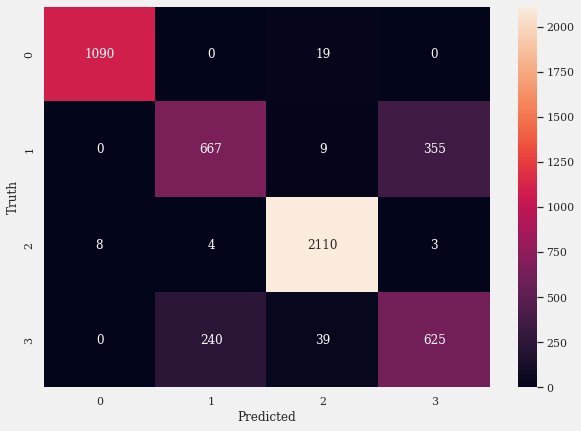

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test_,predictions = ypred2)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **Stratified K-Fold**

Logistic Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# creating instance of labelencoder
le = preprocessing.LabelEncoder()
# Assigning numerical values and storing in another variable
pp = sws_imd.copy() #sws_imd
pp['final_result'] = le.fit_transform(pp.final_result)
pp.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score_100
0,AAA,2013J,74372,M,East Anglian Region,A Level or Equivalent,10-20%,35-55,0,150,N,1,32.8
1,AAA,2013J,111717,F,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,2,48.9
2,AAA,2013J,147756,M,North Region,Lower Than A Level,60-70%,0-35,0,120,N,2,51.3
3,AAA,2013J,185439,M,London Region,HE Qualification,10-20%,0-35,0,120,N,1,7.4
4,AAA,2013J,205719,M,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,90,Y,1,27.3


In [ ]:
sws_enc2 = pd.get_dummies(pp, columns = ['code_module','region','highest_education','imd_band','age_band','disability','gender','code_presentation'])
sws_enc2

,id_student,num_of_prev_attempts,studied_credits,final_result,score_100,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,...,age_band_35-55,age_band_55<=,disability_N,disability_Y,gender_F,gender_M,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,74372,0,150,1,32.800,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1,111717,0,60,2,48.900,1,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
2,147756,0,120,2,51.300,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,185439,0,120,1,7.400,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,205719,0,90,1,27.300,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,2231512,0,60,0,87.900,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
25839,2339789,0,150,0,82.775,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
25840,2471673,0,100,2,77.500,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
25841,2516939,0,60,0,82.900,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1


In [ ]:
filtered2 = sws_enc2.drop(columns = ['id_student',"disability_N","gender_F"])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

filtered_norm2 = filtered2.copy()
cols_to_scale = ['num_of_prev_attempts','studied_credits', 'score_100']

filtered_norm2[cols_to_scale] = scaler.fit_transform(filtered_norm2[cols_to_scale])
filtered_norm2


,num_of_prev_attempts,studied_credits,final_result,score_100,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,...,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_Y,gender_M,code_presentation_2013B,code_presentation_2013J,code_presentation_2014B,code_presentation_2014J
0,0.0,0.200000,1,0.32800,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0.0,0.050000,2,0.48900,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0.0,0.150000,2,0.51300,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,0.0,0.150000,1,0.07400,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0.0,0.100000,1,0.27300,1,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,0.0,0.050000,0,0.87900,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
25839,0.0,0.200000,0,0.82775,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
25840,0.0,0.116667,2,0.77500,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
25841,0.0,0.050000,0,0.82900,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [ ]:
x = filtered2.drop(columns = ['final_result'])
y = filtered2['final_result']

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=5000)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

accuracy = []

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
  print("Train:", train_index, "Validation:", test_index)
  x1_train, x1_test = x.iloc[train_index], x.iloc[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

  model.fit(x1_train, y1_train)
  prediction=model.predict(x1_test)
  score=accuracy_score(prediction,y1_test)
  accuracy.append(score)

print(accuracy)

Train: [ 1264  1265  1282 ... 25840 25841 25842] Validation: [    0     1     2 ... 18782 18783 18784]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 1264  1265  1282 ... 19231 19232 19233]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 2205  2206  2207 ... 19680 19681 19682]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 2783  2784  2785 ... 20128 20129 20130]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 3452  3453  3454 ... 20576 20577 20578]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 4306  4307  4310 ... 23328 23329 23330]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 5107  5108  5109 ... 24021 24022 24023]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 5625  5626  5627 ... 24567 24568 24569]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 6142  6143  6144 ... 25171 25172 25173]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train: [    0     1     2 ... 25171 25172 25173] Validation: [ 6659  6660  6661 ... 25840 25841 25842]
[0.8220502901353965, 0.7798839458413926, 0.7841392649903288, 0.7252321981424149, 0.7306501547987616, 0.6652476780185759, 0.8854489164086687, 0.8405572755417957, 0.8424922600619195, 0.7341331269349846]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
import numpy as np
np.array(accuracy).mean()

0.7809835110874238

## **XGB**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,
                silent=True, nthread=1)

In [ ]:
x.columns

Index(['num_of_prev_attempts', 'studied_credits', 'score_100',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'region_East Anglian Region',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',
       'imd_band_10-20%', 'imd_band_20-30%', 'imd_band_30-40%',
       'imd_band_40-50%', 'imd_band_50-60%', 'imd_band_60-70%',
       'imd_band_70-80%', 'imd_

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
x.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x.columns.values]

In [ ]:
x.columns

Index(['num_of_prev_attempts', 'studied_credits', 'score_100',
       'code_module_AAA', 'code_module_BBB', 'code_module_CCC',
       'code_module_DDD', 'code_module_EEE', 'code_module_FFF',
       'code_module_GGG', 'region_East Anglian Region',
       'region_East Midlands Region', 'region_Ireland', 'region_London Region',
       'region_North Region', 'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'highest_education_A Level or Equivalent',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_0-10%',
       'imd_band_10-20%', 'imd_band_20-30%', 'imd_band_30-40%',
       'imd_band_40-50%', 'imd_band_50-60%', 'imd_band_60-70%',
       'imd_band_70-80%', 'imd_

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

accuracy = []

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
  print("Train:", train_index, "Validation:", test_index)
  x1_train, x1_test = x.iloc[train_index], x.iloc[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

  xgb.fit(x1_train, y1_train)
  prediction=xgb.predict(x1_test)
  score=accuracy_score(prediction,y1_test)
  accuracy.append(score)

print(accuracy)

Train: [ 1264  1265  1282 ... 25840 25841 25842] Validation: [    0     1     2 ... 18782 18783 18784]
Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 1264  1265  1282 ... 19231 19232 19233]
Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 2205  2206  2207 ... 19680 19681 19682]
Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 2783  2784  2785 ... 20128 20129 20130]
Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 3452  3453  3454 ... 20576 20577 20578]
Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 4306  4307  4310 ... 23328 23329 23330]
Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 5107  5108  5109 ... 24021 24022 24023]
Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 5625  5626  5627 ... 24567 24568 24569]
Train: [    0     1     2 ... 25840 25841 25842] Validation: [ 6142  6143  6144 ... 25171 25172 25173]
Train: [    0     1     2 ... 25171 25172 25173] Validation: [ 6659  6660

In [ ]:
import numpy as np
np.array(accuracy).mean()

0.7854312507859704

# **Logistic Regression**

In [ ]:
sws_logs4 = pd.get_dummies(sws_logs1, columns = ['region','highest_education','imd_band','age_band','disability','gender'])
sws_logs4

NameError: ignored

In [ ]:
sws_enc2.columns

In [ ]:
#from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# creating instance of labelencoder
le = preprocessing.LabelEncoder()
# Assigning numerical values and storing in another variable
tt = sws_logs4.copy() #sws_imd
tt['final_result_encoded'] = le.fit_transform(tt.final_result)
tt.head()

In [ ]:
filtered4 = sws_logs4.drop(columns = ['code_module', 'code_presentation','id_student','final_result'])
filtered4.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

filtered_norm2 = filtered4.copy()
cols_to_scale = ['num_of_prev_attempts','studied_credits','sum_click', 'score']

filtered_norm2[cols_to_scale] = scaler.fit_transform(filtered_norm2[cols_to_scale])
filtered_norm2

In [ ]:
filtered_norm2.to_csv('student_data2.csv', index = False)
files.download("student_data2.csv")

In [ ]:
x = sws_enc2.drop(columns = ['final_result','sum_click'])
y = filtered_norm2[['final_result_encoded']]

In [ ]:
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle = True, random_state = 8)

# Use the same function above for the validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state= 8) # 0.25 x 0.8 = 0.2


print("x_train shape: {}".format(x_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(multi_class='multinomial')
reg.fit(x_train, y_train)
# y_pred = reg.predict(x_test)
print("Score when multi_class='multinomial'",reg.score(x_train,y_train))

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
# predictions
y_pred2 = reg.predict(x_test)

# classification report
print(metrics.classification_report(y_test, y_pred2, labels=[0, 1, 2]))

In [ ]:
from sklearn import metrics

# confusion matrix 
confusion_matrix = metrics.plot_confusion_matrix(reg, x_test, y_test, cmap = 'GnBu',labels=[0, 1, 2])
print(confusion_matrix)

In [ ]:
# #accuracy
# print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

In [ ]:
# restricted to binary Classification
#ROC curve and AUC
# y_pred_prob = reg.predict_proba(X_test)[:,1]
# fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
# plt.plot(fpr, tpr)

# auc = metrics.roc_auc_score(y_test, y_pred_prob)
# print("AUC:", round(auc, 2))

# **Descision Tree**

In [ ]:
dtc_na = filtered1.copy()
dtc_na

In [ ]:
x1 = dtc_na.drop(columns = ['final_result_encoded', 'score'])
y1 = dtc_na['final_result_encoded']

In [ ]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.4,random_state=5)
# The train and test size of X and Y
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x1_train, y1_train)

In [ ]:
y1_pred = dtc.predict(x1_test)
y1_pred

In [ ]:
from sklearn import tree
tree.plot_tree(dtc)

In [ ]:
from sklearn import metrics

# confusion matrix 
confusion_matrix = metrics.plot_confusion_matrix(dtc, x1_test, y1_test, cmap = 'GnBu')
print(confusion_matrix)

In [ ]:
#accuracy
print('Accuracy:', metrics.accuracy_score(y1_test, y1_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y1_test,y1_pred))

# **Multiple Linear Regression**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x2 = filtered.drop(columns =['score'])
y2 = filtered.score

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)

In [ ]:
#plotting the linear regression model

model2 = linear_model.LinearRegression()
model2.fit(x2_train, y2_train)

In [ ]:
y2_pred = model2.predict(x2_test)

In [ ]:
#Coefficient result
print('Coefficients:', model2.coef_)
print('Intercept:', model2.intercept_)
print('Mean squared error: %.2f'
     % mean_squared_error(y2_test, y2_pred))
print('Coefficient of determination (R^2): %.2f'
     % r2_score(y2_test, y2_pred))

In [ ]:
plt.scatter(x2.num_of_prev_attempts, y2)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

x3 = sws_imd.drop(columns = ['final_result_encoded'])
y3 = sws_imd['final_result_encoded']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2)

rfc = RandomForestClassifier()
rfc.fit(x3_train, y3_train)
y3_pred = rfc.predict(x3_test)

#accuracy
print('Accuracy:', metrics.accuracy_score(y3_test, y3_pred))

In [ ]:
sws_imd['final_result'] = grades['final_result']
sws_imd['final_result_encoded'] = le.fit_transform(sws_imd.final_result)
sws_imd = sws_imd.drop(columns = ['code_module', 'code_presentation','id_student','gender','region','highest_education','imd_band','age_band','disability',
                              'final_result', 'studied_credits','code_module_encoded'])
sws_imd.head()


# **Try Outs**

In [ ]:
studentAssessment

In [ ]:
a = []
for i in studentAssessment.id_assessment:
  if 1752 >= i <= 1757:
    a.append('2013J')
  elif 1758 >= i <= 1763
    a.append

In [ ]:
studentAssessment['year'] = np.nan

In [ ]:
for i in studentAssessment.id_assessment:
  if 1752 >= i <= 1757:
    studentAssessment.year.append('2013J')
  elif 1758 >= i <= 1763
    studentAssessment.year.append('2014J')

In [ ]:
print('Number of missing entries per column:')
sws_imd.isnull().sum()

In [ ]:
from sklearn.svm import SVC

SVClass = SVC(gamma='auto')

SVClass_pipeline = make_pipeline(column_transform, SVClass)

# Train set
print('Evaluation of the training set')
display_accuracy_scores(SVClass_pipeline, X_train, Y_train)

In [ ]:
# Train set
print('Evaluation of the training set')
display_accuracy_scores(SDG_pipeline, X_train, Y_train)
# Test set evaluation for SVC
print('Evaluation of the test set')

# Fit the training data
SVClass_pipeline.fit(X_train, Y_train)
# Transform the test data
X_test_prepared = column_transform.transform(X_test)
# Predict the test data
SVClass_predictions_test = SVClass.predict(X_test_prepared)

print('Accuracy score:', metrics.accuracy_score(Y_test, SVClass_predictions_test))